# Medulloblastoma Cavalli dataset

### It's a high-dimensional dataset (18479 genes x 764 patients).It's needed preprocessing to reduce the dimensionality: Variance Threshold, PCA, t-SNE...

#### Some exploratory visualization techniques will be perfomed over the data to find for some patterns, clusters...

### PCA_Plot function to plot the explained variance depending on the number of components.
#### 'var' is the variance threshold

In [1]:
def PCA_plot(data, **kwargs):
    # var = variance we want 
    pca = PCA().fit(data)

    %matplotlib inline
    plt.rcParams["figure.figsize"] = (16,8) #size of the image
    fig, ax = plt.subplots() #subplots

    y = np.cumsum(pca.explained_variance_ratio_) #array where stored the cumulative sum of the variance obtained
    xi = np.arange(1, len(y)+1, step=1) #adapt x range to the components needed to explain the variance    
    plt.ylim(0.0,1.1)                                       #limit of y axis
    plt.plot(xi, y, marker='.', linestyle='--', color='b')  #plot xi, and y

    plt.xlabel('Number of Components')          #label
    plt.xticks(np.arange(0, len(y)+1, step=50)) #ticks
    plt.ylabel('Cumulative variance (%)')       
    plt.title('The number of components needed to explain variance')

    if 'var' in kwargs and 0 < kwargs['var'] < 1:                             #if var introduced
        no_components = np.argmax(y>kwargs['var'])+1 #first value in y greather than var
        plt.axhline(y=kwargs['var'], color='r', linestyle='-')  #horizontal line in the variance value we want
        plt.text(0.1, kwargs['var']+0.02, 'Variance explained (%s)'%kwargs['var'], color = 'red', fontsize=16)

        plt.axvline(x=no_components)    #vertical line in the number of components needed to explain that value
        plt.text(no_components+10, 0.05, 'No.Components (%s)'%(no_components), color = 'red', fontsize=16, rotation='vertical')

    ax.grid(axis='x')
    plt.show()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

data = pd.read_csv('Tumor_Medulloblastoma_Cavalli_763_rma_sketch_hugene11t.txt', sep=';', na_values=".")
print("The shape of the data is: ", data.shape)
# 18479 genes as rows
# 763 patients as columns

subgroups = pd.read_csv('GSE85218_subgroups.csv', sep=' ', na_values=".", header=None)
print("The shape of the subgroups is: ", subgroups.shape)

The shape of the data is:  (18479, 763)
The shape of the subgroups is:  (763, 2)


In [3]:

#I rather work with patients as rows (763x18479)
data_t = data.T
print("The shape of the transpose data is: ", data_t.shape)

subgroups.columns = ['key','Subgroup']
data_t.index.name = 'key'
subgroups = subgroups.set_index('key')

mdlblt = pd.DataFrame.join(self=data_t,other=subgroups,on='key',how='inner')
print("The shape of the whole dataset is: ", mdlblt.shape)
mdlblt.head(n=3)

The shape of the transpose data is:  (763, 18479)
The shape of the whole dataset is:  (763, 18480)


,A1CF,A2LD1,A2M,A2ML1,A4GALT,A4GNT,AAA1,AAAS,AACS,AADAC,...,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR,Subgroup
key,,,,,,,,,,,,,,,,,,,,,
gsm2260745,4.336283,5.802193,9.625709,4.161888,6.249825,3.786596,4.378512,8.339850,7.411087,2.963474,...,7.022368,8.498251,4.977280,9.728941,8.821774,8.033423,9.062316,4.432959,3.070389,SHH
gsm2260746,4.044394,7.106432,9.551516,4.129283,4.694880,3.560715,3.523562,8.750205,8.491051,3.217231,...,6.988685,8.571373,5.700440,9.490450,8.266318,9.175674,9.171677,5.733354,3.432959,Group3
gsm2260747,4.247928,5.916477,9.043301,4.035624,4.995485,3.666757,3.722466,8.611025,8.164404,3.137504,...,7.456149,8.727240,5.402586,10.280423,7.857981,7.885086,9.302410,6.841722,3.419539,Group4


### Low Variance filter first, to remove all the columns (genes) with low variance
#### Genes with < 0.10 variance will be removed

In [4]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(0.10) #variance = (standard deviation)^2: how spread out a dataset is
data_t_variance = selector.fit_transform(data_t)
print("With a threshold of 0.10, the dataset is just ", data_t_variance.shape)


With a threshold of 0.10, the dataset is just  (763, 13115)


In [5]:
selector = VarianceThreshold(0.15) #variance = (standard deviation)^2: how spread out a dataset is
data_t_variance15 = selector.fit_transform(data_t)
print("With a threshold of 0.15, the dataset is just ", data_t_variance15.shape)

With a threshold of 0.15, the dataset is just  (763, 9851)


### Keep working with 0.10 variance threshold dataset, just as an exploratory analysis.

### PCA
#### Data needs to be standarized 

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(data_t_variance)
data_rescaled = scaler.transform(data_t_variance) #(x - mu / s) almost all values between -1,1

### Let's plot the relationship between explained variance and number of PCA components

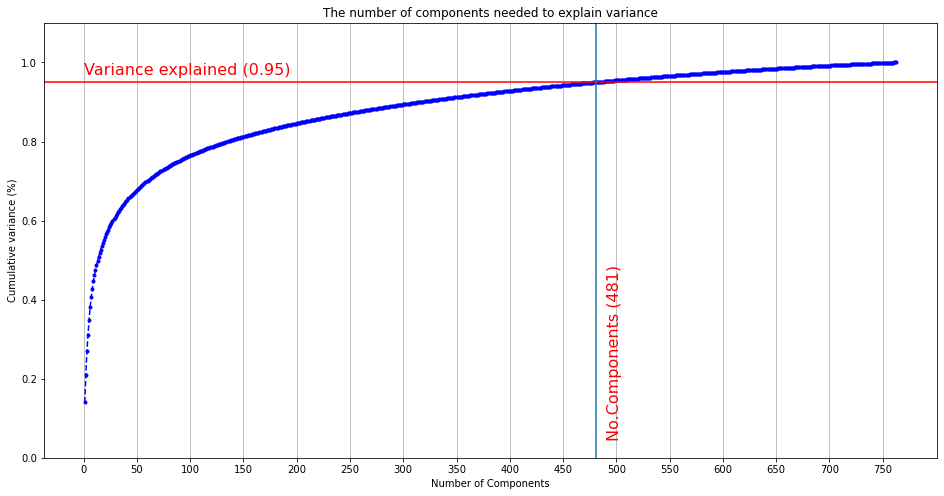

In [7]:
PCA_plot(data_rescaled, var=0.95)

### As it can be seen, the number of components needed to get a explained variance of 0.95 is 481. 

#### If you notice, the number of components that get a 100% of variance explained are 764, exactly the same number as rows. Why?
##### In algebra, it's known that the rank of a matrix M with n rows and m columns is rank(M) = min(n,m). The rank of a matrix is the number of rows (or columns) linearly independent. This, applied to PCA, means that a way to explain the whole variance of the dataset is to "create" a new variable per row.

In [8]:
pca = PCA(n_components=481)
pca.fit(data_rescaled)
data_pca = pca.transform(data_rescaled)
print("PCA Dataset: ", data_pca.shape)

PCA Dataset:  (763, 481)


### Even though there are too many dimensions*, let's try a t-SNE plot just to glimpse a chance of clusters or the relationship between different subgroups.
##### * it is recommended to reduce the number of dimensions (<50) before perfoming t-SNE to improve the speed up and suppress the noise in the data (Laurens van der Maaten’s FAQ)

In [9]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=3, perplexity=30).fit_transform(data_pca)
X_embedded_df = pd.DataFrame(X_embedded)
X_embedded_df.head(n=2)

,0,1,2
0,-66.937187,-24.458597,-29.689905
1,45.325203,-81.111099,20.087488


In [10]:
X_embedded_df['Subgroups']= subgroups['Subgroup'].values

### Perplexity is the parameter that says (loosely) how to balance attention between local and global aspects of the data. Low perplexity values preserves better local structure. The typical values are between 5 and 50.

In [11]:
#This chunck takes a while, at least in my PC
from mpl_toolkits import mplot3d
import matplotlib.patches as mpatches

%matplotlib qt

perplexity_vector = [5,15,30,50,75,100,200] #low perplexity velues preserves better local structure

for i in perplexity_vector:
    X_embedded = TSNE(n_components=3, perplexity=i).fit_transform(data_pca)
    X_embedded_df = pd.DataFrame(X_embedded)
    X_embedded_df['Subgroups']= subgroups['Subgroup'].values

    X_data= X_embedded_df[0]
    Y_data = X_embedded_df[1]
    Z_data = X_embedded_df[2]
    Sbgrp = X_embedded_df['Subgroups']

    cdict = {'Group4': 'red', 'SHH': 'blue', 'WNT': 'green', 'Group3': 'yellow'}
    c = [cdict[val] for val in Sbgrp]

    plt.figure(figsize=(16,10))
    ax = plt.axes(projection='3d')
    ax.scatter3D(X_data, Y_data, Z_data, c=c);
    red_c = mpatches.Patch(color='red', label='Group4')
    blue_c = mpatches.Patch(color='blue', label='SHH')
    green_c = mpatches.Patch(color='green', label='WNT')
    yellow_c = mpatches.Patch(color='yellow', label='Group3')
    plt.legend(handles=[red_c,blue_c,green_c,yellow_c])
    plt.title('t-SNE with perplexity %i'%(i))
    plt.show()

### What happen if now we perfom t-SNE but over the data before the PCA?

In [12]:
for i in perplexity_vector:
    X_embedded = TSNE(n_components=3, perplexity=i).fit_transform(data_t_variance)
    X_embedded_df = pd.DataFrame(X_embedded)
    X_embedded_df['Subgroups']= subgroups['Subgroup'].values

    X_data= X_embedded_df[0]
    Y_data = X_embedded_df[1]
    Z_data = X_embedded_df[2]
    Sbgrp = X_embedded_df['Subgroups']

    cdict = {'Group4': 'red', 'SHH': 'blue', 'WNT': 'green', 'Group3': 'yellow'}
    c = [cdict[val] for val in Sbgrp]

    plt.figure(figsize=(16,10))
    ax = plt.axes(projection='3d')
    ax.scatter3D(X_data, Y_data, Z_data, c=c);
    red_c = mpatches.Patch(color='red', label='Group4')
    blue_c = mpatches.Patch(color='blue', label='SHH')
    green_c = mpatches.Patch(color='green', label='WNT')
    yellow_c = mpatches.Patch(color='yellow', label='Group3')
    plt.legend(handles=[red_c,blue_c,green_c,yellow_c])
    plt.title('t-SNE with perplexity %i'%(i))
    plt.show()

### t-SNE is based on distributions, so it's stocastic. Thus, everytime u run it, u get different results, with a reasonable range.
### PCA Data and not-PCA Data get similar clusters, PCA it's truthful.

### t-SNE doesn't not identify clusters, but separate data according to its value, so it could be seen as a pre-step for clustering. It helps to understand the structure of the data.

### Let's try now UMAP, which should be better than t-SNE keeping global and local structure

In [14]:
import umap

n_neighbors = [5,15,50,75,100,200]

for i in n_neighbors:
    reducer = umap.UMAP(n_components=3,n_neighbors=i)
    embedding = reducer.fit_transform(data_pca)
    embedding_df = pd.DataFrame(embedding)
    embedding_df['Subgroups']= subgroups['Subgroup'].values

    X_data= embedding_df[0]
    Y_data = embedding_df[1]
    Z_data = embedding_df[2]
    Sbgrp = embedding_df['Subgroups']

    plt.figure(figsize=(16,10))
    ax = plt.axes(projection='3d')
    ax.scatter3D(X_data, Y_data, Z_data, c=c);
    red_c = mpatches.Patch(color='red', label='Group4')
    blue_c = mpatches.Patch(color='blue', label='SHH')
    green_c = mpatches.Patch(color='green', label='WNT')
    yellow_c = mpatches.Patch(color='yellow', label='Group3')
    plt.legend(handles=[red_c,blue_c,green_c,yellow_c])
    plt.title('UMAP with n_neighbors %i'%(i))
    plt.show()

### UMAP to non-PCA data

In [15]:
for i in n_neighbors:
    reducer = umap.UMAP(n_components=3,n_neighbors=i)
    embedding = reducer.fit_transform(data_t_variance)
    embedding_df = pd.DataFrame(embedding)
    embedding_df['Subgroups']= subgroups['Subgroup'].values

    X_data= embedding_df[0]
    Y_data = embedding_df[1]
    Z_data = embedding_df[2]
    Sbgrp = embedding_df['Subgroups']

    plt.figure(figsize=(16,10))
    ax = plt.axes(projection='3d')
    ax.scatter3D(X_data, Y_data, Z_data, c=c);
    red_c = mpatches.Patch(color='red', label='Group4')
    blue_c = mpatches.Patch(color='blue', label='SHH')
    green_c = mpatches.Patch(color='green', label='WNT')
    yellow_c = mpatches.Patch(color='yellow', label='Group3')
    plt.legend(handles=[red_c,blue_c,green_c,yellow_c])
    plt.title('UMAP with n_neighbors %i'%(i))
    plt.show()

### UMAP is usually considered a better data visualization tool that t-SNE*. In this case, it shows what seems a strong relationship between Group3 and Group4 Medulloblastoma Subgroups. 
### Further studies needed, but the data visualization gives some hints.

##### * strong controversy

In [ ]:
# pca_data_df = pd.DataFrame(data_pca)
# pca_data_df['Patients']= dd
# pca_data_df = pca_data_df.set_index('Patients')
# pca_data_df = pd.DataFrame.join(self=data_t,other=subgroups,on='key',how='inner')
# pca_data_df.head(n=2)